# Notebook 1: Derivatives  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mattsankner/micrograd/blob/main/mg1_derivatives.ipynb)  [![View in nbviewer](https://img.shields.io/badge/view-nbviewer-orange)](https://nbviewer.jupyter.org/github/mattsankner/micrograd/blob/main/mg1_derivatives.ipynb)

# Welcome to the first mini micrograd lecture from the Andrej Karpathy Neural Net series! Let's dive right in.

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Plotting Scalar Values on a Function

Scalar Value: a single numerical value. It can be an integer, a float, a real number, or a complex number. Scalars are used to represent quantities that have magnitude but no direction. 

Vectors, however, are different because they have both magnitude and direction. 

Let's define a scalar value function $f(x)$ that takes a single scalar $x$ and returns a single scalar $y$.

In [27]:
def f(x):
  return 3*x**2 - 4*x + 5

In [28]:
f(3.0)

20.0

We can get a sense of this quadratic function's shape with a plot. Let's make values for our plot in an array. We do this below using the numpy library, passing in a range and step size.

In [8]:
#feed in scalar values from range -5 to 5, not including 5, in steps of .25
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

Now, we set $ys$ to the function of $xs$, effectively calling this function on the numpy array.

In [11]:
#y's end up also applying f(x) on each one of these elemnents independently
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

Passing these values into the function $f(x)$ will give us our curve we are looking for. We use the matplotlib.pyplot library to plot our function with the data passed in.

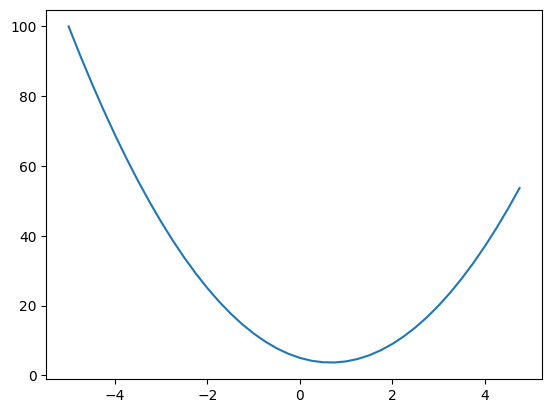

In [12]:
plt.plot(xs,ys)

Look at the two outputs before the graph, and find the $8th$ to last element in each. We fed in $3$ (the x-coordinate, and got back $20$ (the y-coordinate). Now look at the graph above and see how it aligns. Nobody in neural nets actually writes out the exp for NN. It would be a massive amount of terms. 

Now, let's think through what the derivative of this function at different points $x$ of this function.

## Derivatives

**Derivative: measures how the function's output value changes as its input value changes.** More precisely, the derivative of a function 
f at a point x represents the rate of change or the slope of the tangent line to the function's graph at that point.

$$ f(x) = \frac{f(x+h) - f(x)}{h} $$

This above function is known as the **difference quotient**. It represents the average rate of change of the function $x$ over the interval $h$. 

The derivative of $f(x)$ is the limit of the diffence quotient as $h$ gets smaller and smaller, approaching $0$, as below:

$$ f'(x) = \lim_{{h \to 0}} \frac{f(x+h) - f(x)}{h} $$

Basically, if you take a point $x$, and slightly bump it up by a small number $h$, we are calculating how the function responds (what is the slope, is it negative or positive, and how steep is it)?

When we calculate this, we are finding the instantaneous rate of change of $f$ at a single point $x$ (**instantaneous** rate of **change** is a paradox, but that's outside the scope if this conversation). If the output changes (the limit exists), then $f$ is differentiable to $x$, which means the derivative of $f(x)$ is the value of the limit.

Let's evaluate the derivative by picking a small $h$. We would expect the below to affect slope slightly positively, as we stick with the same value for $x$ as before. The function orignally returns $20$, so we would expect $f(x)$ to be slightly higher than $20$.

In [16]:
h = 0.001
x = 3.0
f(x+h)

20.014003000000002

Great!

**Now we want to know how much the function responds in the positive direction.** We normalize by the run ($rise/run$, or $h$) to get the slope (the numerical approx of the slope), because we have to make $h$ very very small to converge to the exact amount. 

If we do too many $0's$ in $h$, at some point, we get an incorrect answer because of floating point error. Representation of all numbers in computer memory is finite. We keep converging toward right answer by decrementing $h$.

As we adjust $h$ to be smaller, derivative is slightly bigger. The derivative is $14$.

In [20]:
h = 0.00000001
x = 3.0
(f(x+h) - f(x))/h

14.00000009255109

This means at $x = 3$, the slope is $14$. You can see that by differentiating it the original function your head (this is different than just plugging $x$ in to the original $f(x)$, if you are not familiar), and then plug in $x = 3$ to the differentiated equation:

The function \( f(x) \) is given by: 
$$f(x) = 3x^2 - 4x + 5$$

The derivative of \( f(x) \) is: 

$$f'(x) = \frac{d}{dx}(3x^2 - 4x + 5) = 6x - 4$$

$$f'(x) = 6(3) - 4 = 14$$


Differentiation is the process of finding the derivative of a function, which gives us the slope of the tangent line to the function at any given point.

### The power rule for differentiation:
The power rule states that if
$f(x) = ax^n$ , then $f'(x) = anx^(n-1)$. 

Thus, $3x^2$ goes to $(2*3)x^(2-1) = 6x$, while $-4x$ goes to $-4$, and $5$ to $0$. The derivative of the constant term 5 is 0 (since the derivative of a constant is always zero.

**What about the slope at $x = -3$?** Would you expect for the slope? Predicting the exact value is really hard, but what's the sign of that slope?

If we slightly go in the positive direction at $x$, $f(x$ goes down, so the function is negative. So that tells us we would get something below $20$. Go ahead and change the $3.0$ to negative above and test it out (should be about $22$).

At some point, the slope/derivative would be $0$. In this case, it's $2/3$ roughly. This is when if we nudge in a $+/-$ direction, the slope doesn't respond.

## More complex examples to understand differentiation

Now, we have a function with output d that is a function of three scalar inputs a,b, and c. 

In [22]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In order to evaluate the derivative and learn what it's telling us, we're going to get a small value of $h$. Then, we fix inputs at some values that we're interested in, $a$, $b$, $c$. We are evaluating the derivative of $d$ with respect to  $a$, $b$, and $c$. 

$d1$ is that expression below. We'll start by calculating the derivative of $d$ with respect to $a$.

In [23]:
#tiny step
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

#function
d1 = a*b + c

#calculating the derivative of d with respect to a. a going slightly higher means a slightly higher b, which is negative. 
#This means a lower value of d2 below
a += h 

#d2 being slightly greater than 4 or less than 4 tells us the sign of derivative.
#if increasing a makes d2 go down, the derivative is negative
d2 = a*b + c

**$d2$** tells us how much function increased when we bumped the specific input we're interested in by a tiny amount. 
This is then normalized by h to get the slope. The exact amount of slope is -3. 

In [25]:
print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)  

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


**We can prove that $-3$ is correct: if you have $d =a*b + c$, differentiating that with respect to $a$ (calculating how much $d$ would change if you changed $a$ gives you just b because $c$ is a constant and does not change with $a$. The value of $b$ is $-3$, which is the derivative that we have calculated. Therefore, the derivative of $d = ab + c$ with respect to $a$ is indeed $b = -3$.**

If we bump $b$ a little bit in a positive direction, $(b+=h)$, then the slope goes up because $a$ is positive, resulting in a higher value for $d$. The slope of this increase $2$ because the derivative of $d$ with respect to $b$ gives us $a$, which is $2$ ($d$ by $db = a$)


When you differentiate $d$ with respect to $b$, you get $a$, which is $2.0$. This means that for a small change in $b$, the change in $d$ will be proportional to $a$. This means that for a small change in $b$, $d$ changes by $2.0$ times that amount. The rate of change of $d$ with respect to $b$ is $2$.


When we bump $c$ ... i.e $(c+=h),c$ becomes slightly higher, which makes the function $d$ increase by the exact amount added to $c$. This tells us that the slope is $1$. That's the rate at which $d$ will increase as we change $c$. Even if we make $h=1$ and not $0.00001$, the slope equals $1$, so it is always approaching $1$ and never exceeds it.

In [29]:
h = 1 #could be 0.00001, etc.

# inputs
a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c

#derivative of d with respect to a
c += h 
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h) 
#how much function increased when we bumped the specific input (a,b,c) we're interested in by a tiny amount. 
#this is then normalized by h to get the slope.

d1 4.0
d2 5.0
slope 1.0


## Congrats on completing the first mini-lecture!

## Neural Networks need massive data structures to build out these basic expressions as they get bigger. That's what we'll build out in the next mini lecture. We're going begin building out the value object in the Andrej's readme, and begin to do backpropogation.